## Exploration and visualisation of the data

In [58]:
import os
from prettytable import PrettyTable

dataset_folder = os.getcwd() + '/Gemstones_dataset'

def count_images_per_category(root_dir):
    category_counts = {}
    for foldername in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, foldername)
        if os.path.isdir(folder_path):
            category_counts[foldername] = len(os.listdir(folder_path))
    return category_counts

# Train count
train_folder = os.path.join(dataset_folder, 'train')
train_category_counts = count_images_per_category(train_folder)

# Test count
test_folder = os.path.join(dataset_folder, 'test')
test_category_counts = count_images_per_category(test_folder)

# Total count
combined_category_counts = {}
for category in sorted(set(list(train_category_counts.keys()) + list(test_category_counts.keys()))):
    combined_category_counts[category] = train_category_counts.get(category, 0) + test_category_counts.get(category, 0)

table = PrettyTable(['Category', 'Train Count', 'Test Count', 'Total Count'])
for category, count in combined_category_counts.items():
    train_count = train_category_counts.get(category, 0)
    test_count = test_category_counts.get(category, 0)
    table.add_row([category, train_count, test_count, count])

print(table)

num_categories = len(combined_category_counts)
print(f"\nNumber of categories: {num_categories}")

+-------------------+-------------+------------+-------------+
|      Category     | Train Count | Test Count | Total Count |
+-------------------+-------------+------------+-------------+
|    Alexandrite    |      34     |     4      |      38     |
|     Almandine     |      31     |     4      |      35     |
|     Amazonite     |      32     |     4      |      36     |
|       Amber       |      31     |     4      |      35     |
|      Amethyst     |      35     |     4      |      39     |
|      Ametrine     |      35     |     4      |      39     |
|     Andalusite    |      32     |     4      |      36     |
|     Andradite     |      31     |     4      |      35     |
|     Aquamarine    |      36     |     5      |      41     |
|  Aventurine Green |      45     |     5      |      50     |
| Aventurine Yellow |      34     |     4      |      38     |
|     Benitoite     |      31     |     4      |      35     |
|    Beryl Golden   |      36     |     4      |      4

In [59]:
def get_extensions(folder_path):
    extensions = set()
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            extension = os.path.splitext(file)[1]
            extensions.add(extension)
    return extensions

dataset_extensions = get_extensions(dataset_folder)

print("Extensions of images:", dataset_extensions)

Extensions of images: {'.jpg'}


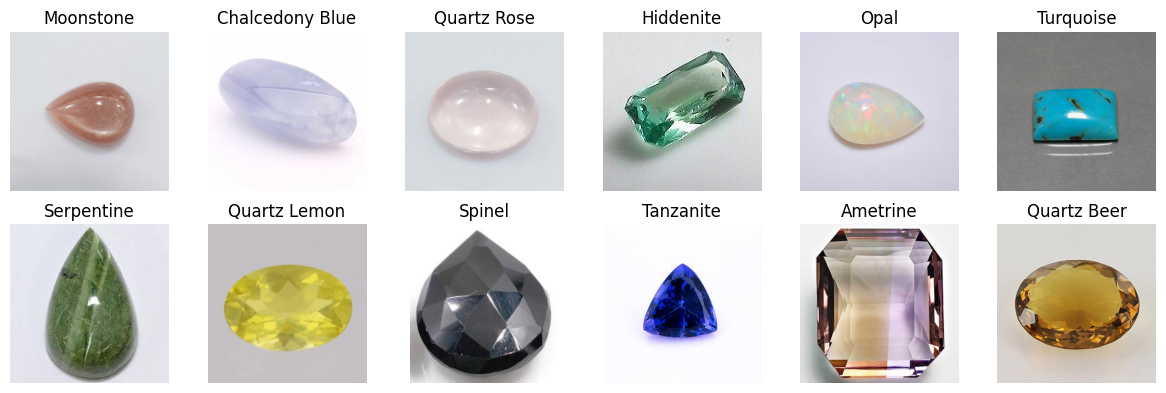

In [62]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_random_images(root_dir, num_images=12):
    fig, axes = plt.subplots(2, 6, figsize=(12, 4))
    categories = os.listdir(root_dir)
    for i in range(num_images):
        category = random.choice(categories)
        category_folder = os.path.join(root_dir, category)
        image_file = random.choice(os.listdir(category_folder))
        image_path = os.path.join(category_folder, image_file)
        img = mpimg.imread(image_path)
        ax = axes[i // 6, i % 6]
        ax.imshow(img)
        ax.set_title(category)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Show random images from train folder
train_folder = os.path.join(dataset_folder, 'train')
show_random_images(train_folder)